Kütüphanelerin Yüklenmesi

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import os

In [155]:
df = pd.read_csv("/content/drive/MyDrive/GELISIMGERILIGI/ToddlerAutism2018.csv")

In [156]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [157]:
df.shape

(1054, 19)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [159]:
df = df.rename(columns={"Age_Mons":"Age Months",
                        "Family_mem_with_ASD":"Family Member with ASD",
                        "Class/ASD Traits ": "ASD Traits"})
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [160]:
df["Ethnicity"].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [161]:
df["Ethnicity"] = df["Ethnicity"].replace("mixed", "Others")
df["Ethnicity"] = df["Ethnicity"].replace("Native Indian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("asian", "Other Asians")
df["Ethnicity"] = df["Ethnicity"].replace("middle eastern", "Middle Eastern")
df["Ethnicity"] = df["Ethnicity"].replace("south asian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("black", "African")

In [162]:
df["Ethnicity"].value_counts()

White European    334
Other Asians      299
Middle Eastern    188
South Asian        63
African            53
Others             43
Hispanic           40
Latino             26
Pacifica            8
Name: Ethnicity, dtype: int64

In [163]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [164]:
df["Who completed the test"] = df["Who completed the test"].replace("family member", "Family Member")
df["Who completed the test"] = df["Who completed the test"].replace("Health care professional", "Health Care Professional")

In [165]:
df["Who completed the test"].value_counts()

Family Member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [134]:
cat_df = df[["Sex", "Ethnicity", "Jaundice", "Who completed the test", "Family Member with ASD", "ASD Traits"]]
num_df = df[["A1", "A2", "A3", "A4","A5","A6", "A7", "A8", "A9", "A10", "Qchat-10-Score", "Age Months"]]

In [135]:
for col in df.iloc[:, 13: ]:
    print(col,"\n", df[col].unique(), "\n")

Sex 
 ['f' 'm'] 

Ethnicity 
 ['Middle Eastern' 'White European' 'Hispanic' 'African' 'Other Asians'
 'South Asian' 'Others' 'Latino' 'Pacifica'] 

Jaundice 
 ['yes' 'no'] 

Family Member with ASD 
 ['no' 'yes'] 

Who completed the test 
 ['Family Member' 'Health Care Professional' 'Self' 'Others'] 

ASD Traits 
 ['No' 'Yes'] 



In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Case_No,1054.0,527.500000,304.407895,1.0,264.25,527.5,790.75,1054.0
A1,1054.0,0.563567,0.496178,0.0,0.00,1.0,1.00,1.0
A2,1054.0,0.448767,0.497604,0.0,0.00,0.0,1.00,1.0
A3,1054.0,0.401328,0.490400,0.0,0.00,0.0,1.00,1.0
A4,1054.0,0.512334,0.500085,0.0,0.00,1.0,1.00,1.0
A5,1054.0,0.524668,0.499628,0.0,0.00,1.0,1.00,1.0
A6,1054.0,0.576850,0.494293,0.0,0.00,1.0,1.00,1.0
A7,1054.0,0.649905,0.477226,0.0,0.00,1.0,1.00,1.0
A8,1054.0,0.459203,0.498569,0.0,0.00,0.0,1.00,1.0
A9,1054.0,0.489564,0.500128,0.0,0.00,0.0,1.00,1.0


<ipython-input-92-039d3b82b4f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="RdBu", annot=True)


<Axes: >

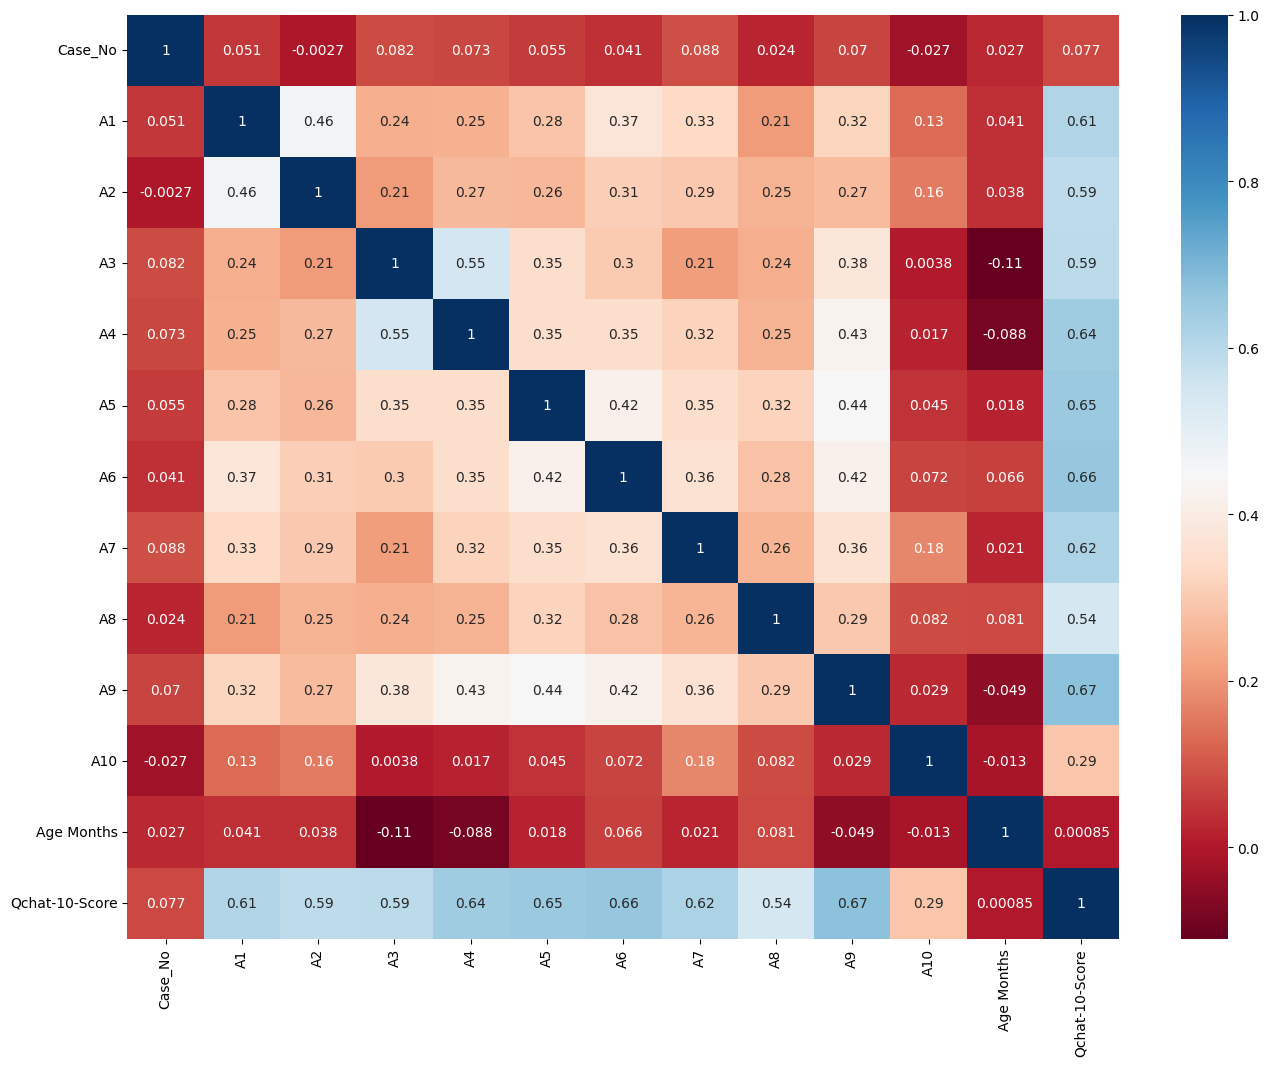

In [92]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap="RdBu", annot=True)

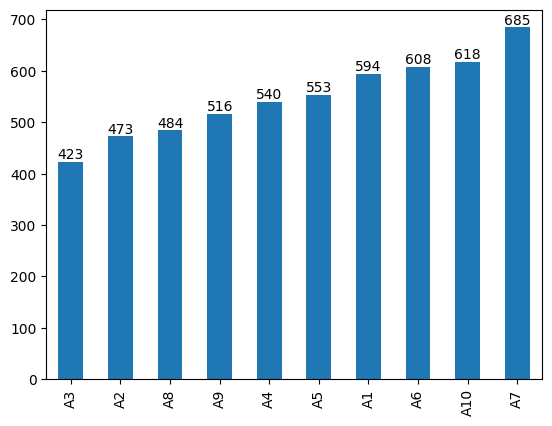

In [19]:
ax = df.iloc[:, 1:11].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);

<Axes: ylabel='ASD Traits'>

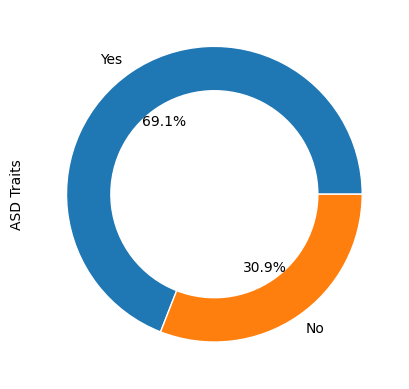

In [93]:
df["ASD Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))

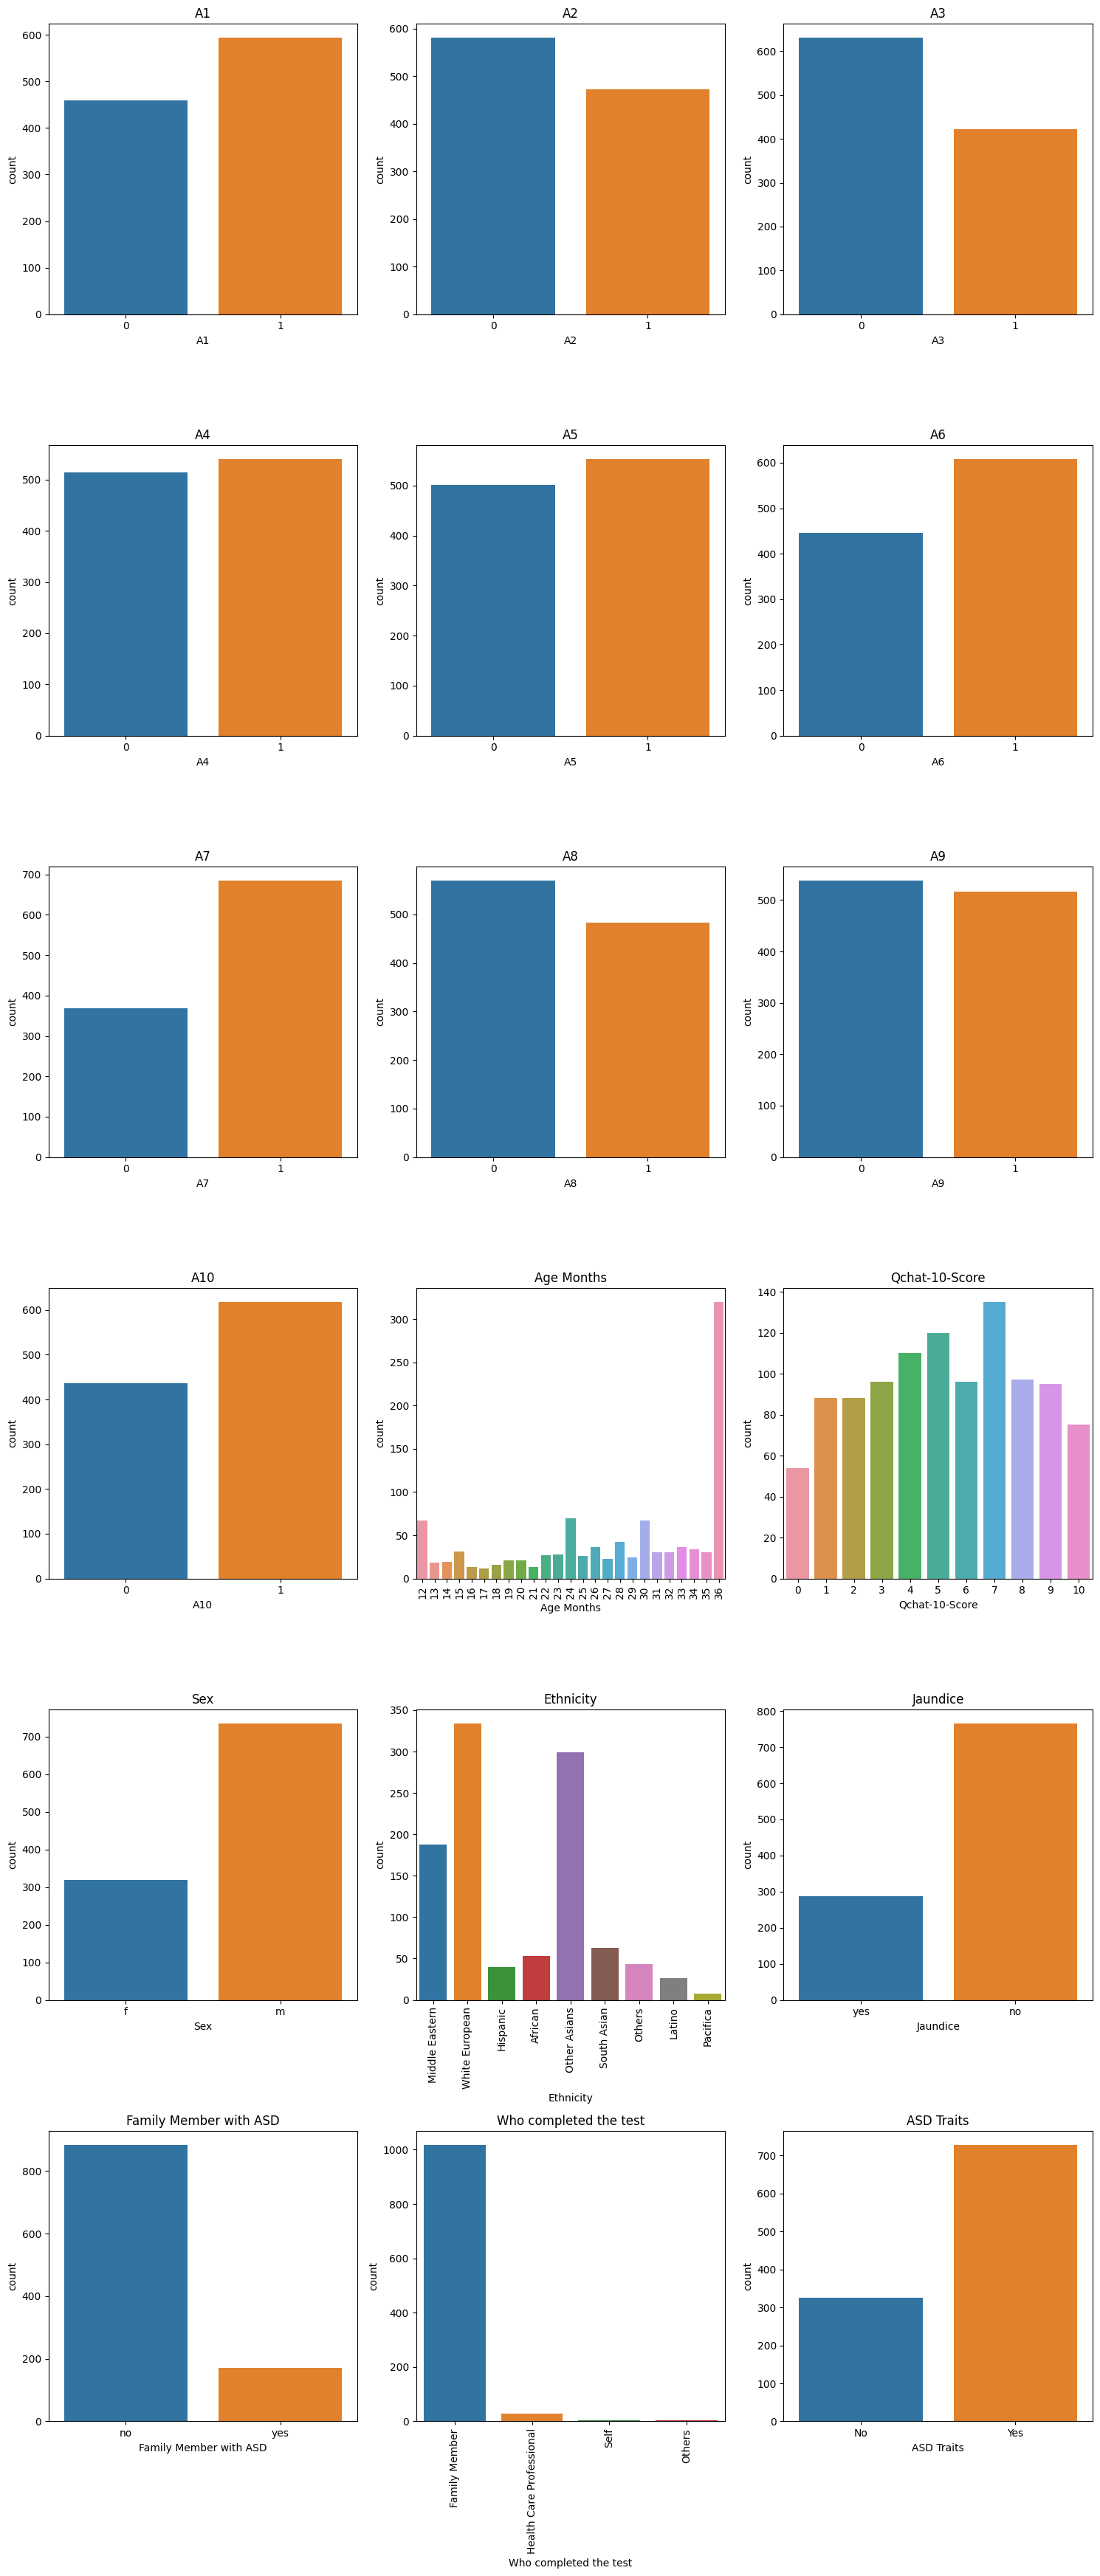

In [21]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(df.iloc[:,1:]):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

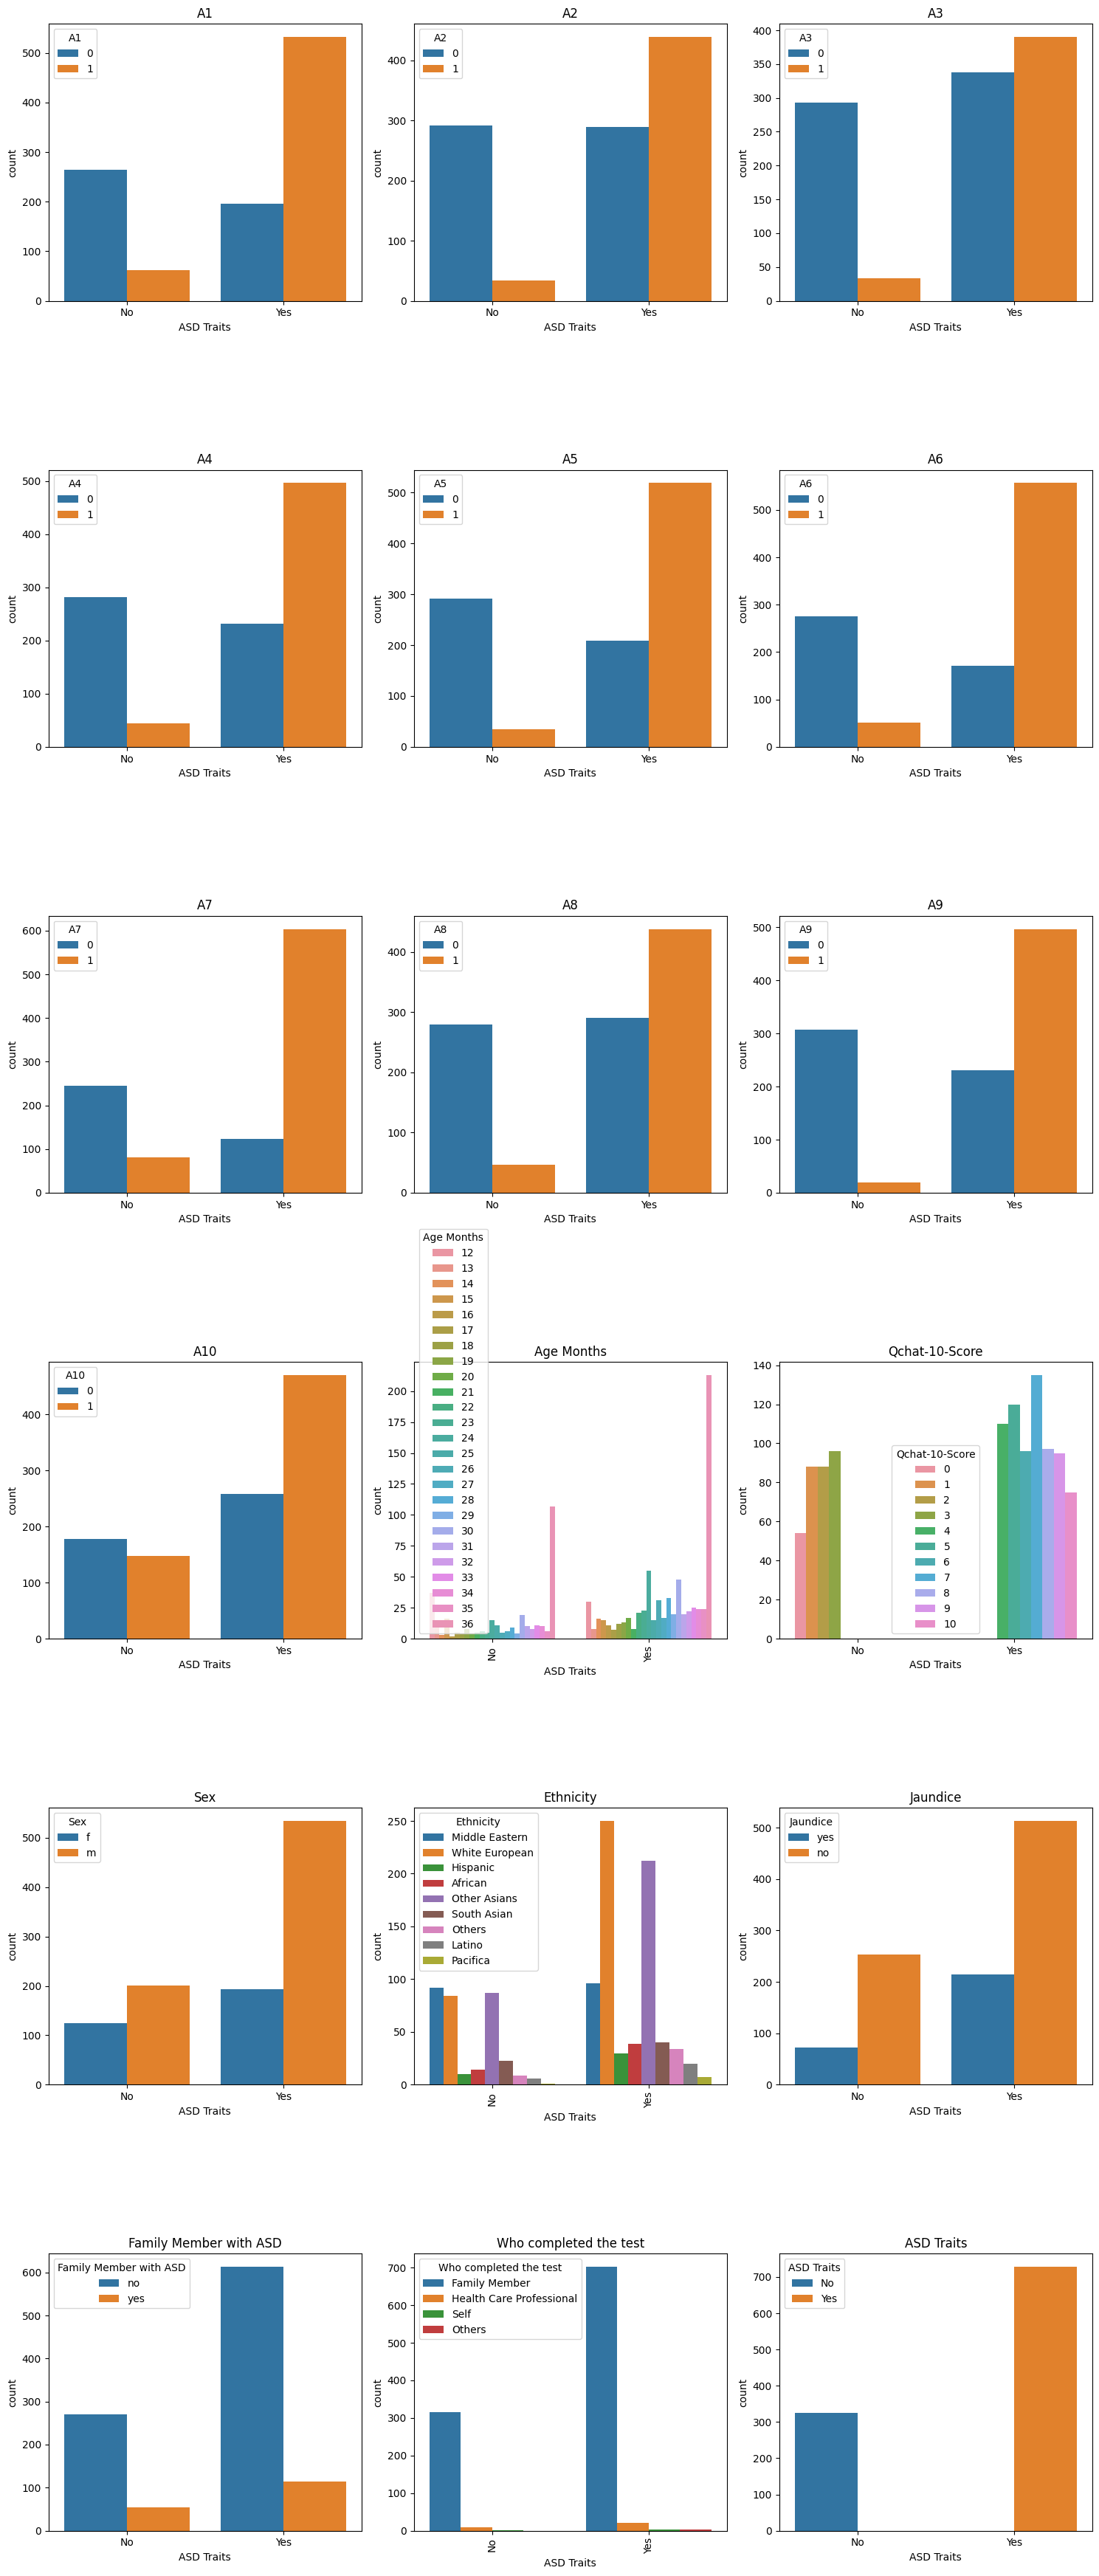

In [22]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(df.iloc[:, 1:]):
    sns.countplot(x=df["ASD Traits"], hue=df[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

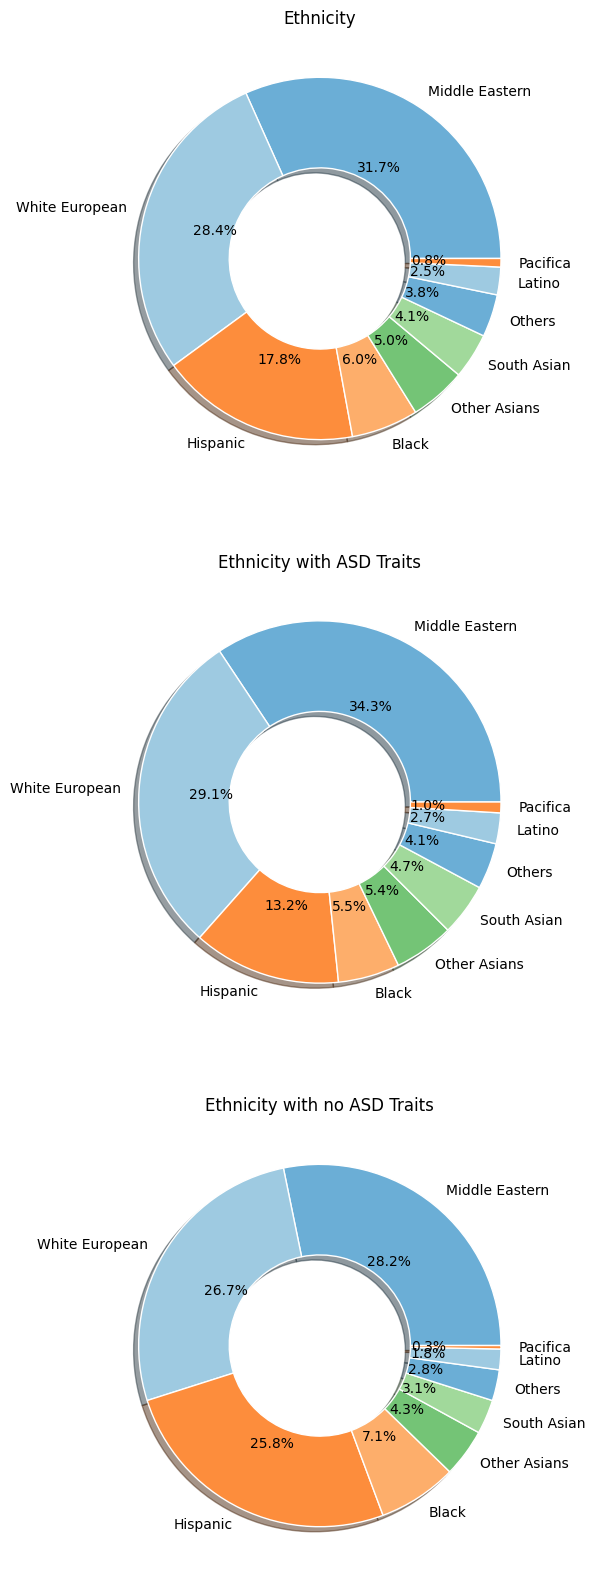

In [94]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

size = 0.5
eth_vals = df["Ethnicity"].value_counts()
labels_eth =  ['Middle Eastern', 'White European', 'Hispanic', 'Black',
       'Other Asians ', 'South Asian', 'Others', 'Latino',
       'Pacifica']

yes = df[df["ASD Traits"]=="Yes"]["Ethnicity"].value_counts()
no = df[df["ASD Traits"]=="No"]["Ethnicity"].value_counts()


asd_vals = df["ASD Traits"].value_counts()
labels_asd = ['No', 'Yes']
cmap = plt.colormaps["tab20c"]


outer_colors = cmap([1, 2, 5, 6, 9, 10])


ax[0].pie(eth_vals, radius=1, colors=outer_colors, labels=labels_eth, autopct="%1.1f%%", shadow=True,
       wedgeprops=dict(width=size, edgecolor='w'))
ax[0].set_title("Ethnicity")
ax[1].pie(yes, radius=1, colors=outer_colors, labels=labels_eth, autopct="%1.1f%%", shadow=True,
       wedgeprops=dict(width=size, edgecolor='w'))
ax[1].set_title("Ethnicity with ASD Traits")

ax[2].pie(no, radius=1, colors=outer_colors, labels=labels_eth, autopct="%1.1f%%", shadow=True,
       wedgeprops=dict(width=size, edgecolor='w'))
ax[2].set_title("Ethnicity with no ASD Traits")

plt.show()

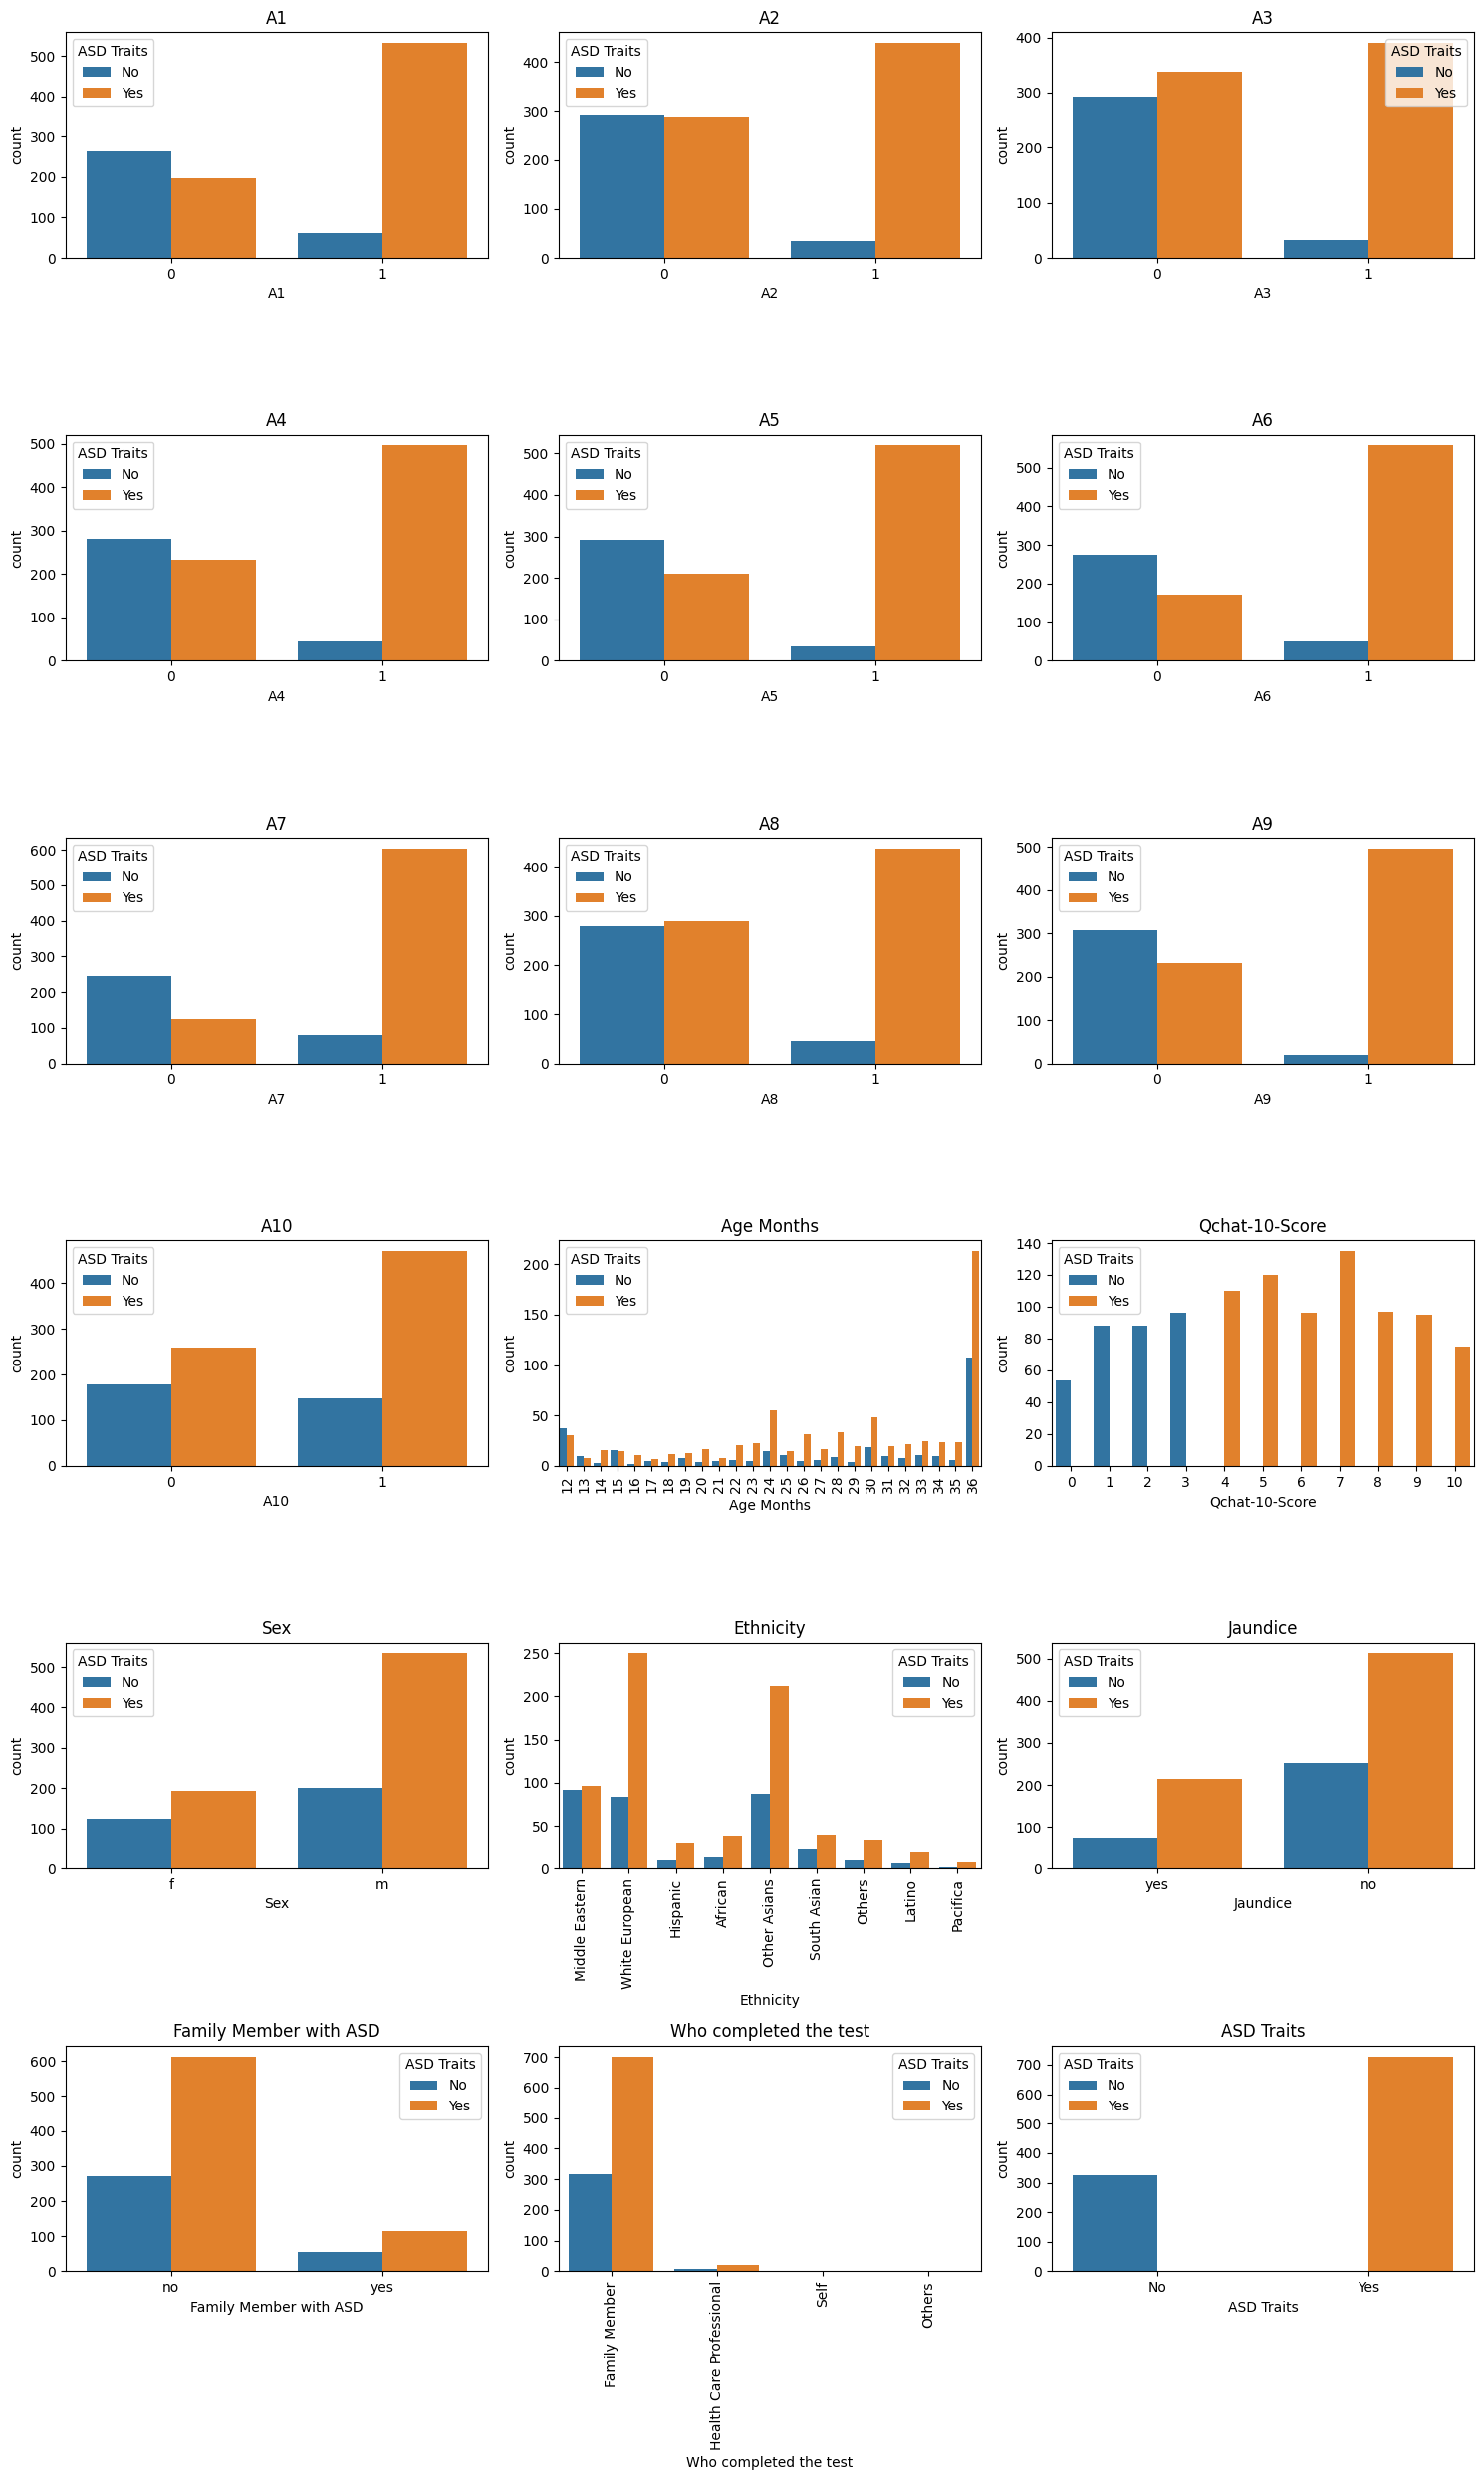

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))

axes = axes.ravel()
for i, col in enumerate(df.iloc[:, 1:]):
    sns.countplot(x=df[col], hue=df["ASD Traits"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

**Veri Düzenleme**

In [167]:
df.drop(columns=["Case_No",  "Qchat-10-Score" ], axis=1, inplace=True)

In [168]:
mini = df["Age Months"].min()
maxi = df["Age Months"].max()
print(f"Minimum age month {mini} and Maximum age month {maxi}")

Minimum age month 12 and Maximum age month 36


In [169]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,Middle Eastern,yes,no,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,Middle Eastern,yes,no,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Family Member,Yes


In [170]:
df["ASD Traits"].value_counts()

Yes    728
No     326
Name: ASD Traits, dtype: int64

In [171]:
df["Ethnicity"].value_counts()

White European    334
Other Asians      299
Middle Eastern    188
South Asian        63
African            53
Others             43
Hispanic           40
Latino             26
Pacifica            8
Name: Ethnicity, dtype: int64

In [172]:
df["Ethnicity"].replace(["African", "Hispanic", "Latino", "Pacifica"], "Others", inplace=True)

In [173]:
df["Ethnicity"].value_counts()

White European    334
Other Asians      299
Middle Eastern    188
Others            170
South Asian        63
Name: Ethnicity, dtype: int64

**Label encoding**

In [174]:
df_kategorik=df.select_dtypes(include=["object"]).copy()

In [175]:
df_columns=df_kategorik.columns
df_columns

Index(['Sex', 'Ethnicity', 'Jaundice', 'Family Member with ASD',
       'Who completed the test', 'ASD Traits'],
      dtype='object')

In [176]:
from sklearn.preprocessing import LabelEncoder
for i in df_columns:
  lbe = LabelEncoder()
  df[i]=lbe.fit_transform(df[i])

In [177]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,0,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,4,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,2,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,4,0,1,0,1


**DATA SPLITTING**

In [178]:
y=df["ASD Traits"]
X=df.drop(["ASD Traits"],axis=1)

**Handling Imbalance Datasets**

In [107]:
# Python OOP yapısı kullanılmıştır.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

class ImbalanceDuzenle:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def RUS(self):
        rus = RandomUnderSampler(random_state=42, replacement=True)
        X_rus, y_rus = rus.fit_resample(self.X, self.y)
        print('orjinal veri boyutu:', self.y.value_counts())
        print('RUS yapıldıktan sonra veri boyutu:', y_rus.value_counts())
        return X_rus, y_rus

    def ROS(self):
        ros = RandomOverSampler(random_state=42)
        X_ros, y_ros = ros.fit_resample(self.X, self.y)
        print('orjinal veri boyutu', self.y.value_counts())
        print('ROS yapıldıktan sonra veri boyutu:', y_ros.value_counts())
        return X_ros, y_ros

    def TL(self):
        tl = TomekLinks()
        X_tl, y_tl = tl.fit_resample(self.X, self.y)
        print('orjinal veri boyutu', self.y.value_counts())
        print('TL yapıldıktan sonra veri boyutu:', y_tl.value_counts())
        return X_tl, y_tl

    def Smote(self):
        smote = SMOTE()
        X_smote, y_smote = smote.fit_resample(self.X, self.y)
        print('orjinal veri boyutu', self.y.value_counts())
        print('Smote yapıldıktan sonra veri boyutu:', y_smote.value_counts())
        return X_smote, y_smote

    def NM(self):
        nm = NearMiss()
        X_nm, y_nm = nm.fit_resample(self.X, self.y)
        print('orjinal veri boyutu', self.y.value_counts())
        print('NM yapıldıktan sonra veri boyutu:', y_nm.value_counts())
        return X_nm, y_nm



In [108]:
ImbalanceDuzenle=ImbalanceDuzenle(X,y)

In [109]:
X_smote,y_smote= ImbalanceDuzenle.Smote()

orjinal veri boyutu 1    728
0    326
Name: ASD Traits, dtype: int64
Smote yapıldıktan sonra veri boyutu: 0    728
1    728
Name: ASD Traits, dtype: int64


**Classification Algortihms**

In [179]:
#Python OOP yapısı kullanılmıştır.
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn import metrics, model_selection, preprocessing
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     cross_val_score, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


class YontemML:
  def __init__(self, X,y) :
      self.X = X
      self.y=  y
      self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.33,random_state=42)

  def Logistic(self):
    print("*****Logistic Regression*****")
    loj_model=LogisticRegression().fit(self.X_train,self.y_train)
    y_pred_loj=loj_model.predict(self.X_test)
    loj_skor= accuracy_score(y_pred_loj,self.y_test)
    print('Logistic Model Dogrulugu:', loj_skor)
    print("Logistic Classification report")
    cf_matrix_loj=confusion_matrix(y_pred_loj,self.y_test)
    sns.heatmap(cf_matrix_loj,annot=True,cbar=False, fmt='g')
    plt.title("Logistic Model Doğruluğu:"+str(loj_skor))
    print(classification_report(y_pred_loj,self.y_test))
    plt.show()
    return loj_model


  def Knn(self):
    print("*****KNN Algoritmasi*****")
    knn_model=KNeighborsClassifier().fit(self.X_train,self.y_train)
    y_pred_knn=knn_model.predict(self.X_test)
    knn_skor= accuracy_score(y_pred_knn,self.y_test)
    print('KNN Model Dogrulugu:', knn_skor)
    print("KNN Classification report")
    cf_matrix_knn=confusion_matrix(y_pred_knn,self.y_test)
    sns.heatmap(cf_matrix_knn,annot=True,cbar=False, fmt='g')
    plt.title("KNN Model Doğruluğu:"+str(knn_skor))
    print(classification_report(y_pred_knn,self.y_test))
    plt.show()
    return knn_model


  def Svm(self):
    print("*****SVM Algoritmasi*****")
    svm_model=SVC().fit(self.X_train,self.y_train)
    y_pred_svm=svm_model.predict(self.X_test)
    svm_skor= accuracy_score(y_pred_svm,self.y_test)
    print('SVM Model Dogrulugu:', svm_skor)
    print("SVM Classification report")
    cf_matrix_svm=confusion_matrix(y_pred_svm,self.y_test)
    sns.heatmap(cf_matrix_svm,annot=True,cbar=False, fmt='g')
    plt.title("SVM Model Doğruluğu:"+str(svm_skor))
    print(classification_report(y_pred_svm,self.y_test))
    plt.show()
    return svm_model


  def Decisiontree(self):
    print("*****Decision Tree Algoritmasi*****")
    cart_model=DecisionTreeClassifier().fit(self.X_train,self.y_train)
    y_pred_cart=cart_model.predict(self.X_test)
    cart_skor= accuracy_score(y_pred_cart,self.y_test)
    print('Decision Tree Model Dogrulugu:', cart_skor)
    print("Decision Tree Classification report")
    cf_matrix_cart=confusion_matrix(y_pred_cart,self.y_test)
    sns.heatmap(cf_matrix_cart,annot=True,cbar=False, fmt='g')
    plt.title("Decision Tree Model Doğruluğu:"+str(cart_skor))
    print(classification_report(y_pred_cart,self.y_test))
    plt.show()
    return cart_model


  def Randomforest(self):
    print("*****Random Forest Algoritmasi*****")
    rf_model=RandomForestClassifier().fit(self.X_train,self.y_train)
    y_pred_rf=rf_model.predict(self.X_test)
    rf_skor= accuracy_score(y_pred_rf,self.y_test)
    print('Random Forest Model Dogrulugu:', rf_skor)
    print("Random Forest Classification report")
    cf_matrix_rf=confusion_matrix(y_pred_rf,self.y_test)
    sns.heatmap(cf_matrix_rf,annot=True,cbar=False, fmt='g')
    plt.title("Random Forest Model Doğruluğu:"+str(rf_skor))
    print(classification_report(y_pred_rf,self.y_test))
    plt.show()
    return rf_model


  def Xgboost(self):
    print("*****XGBoost Algoritmasi*****")
    xgbm_model=XGBClassifier().fit(self.X_train,self.y_train)
    y_pred_xgbm=xgbm_model.predict(self.X_test)
    xgbm_skor= accuracy_score(y_pred_xgbm,self.y_test)
    print('XGBOOST Model Dogrulugu:', xgbm_skor)
    print("XGBOOST Classification report")
    cf_matrix_xgbm=confusion_matrix(y_pred_xgbm,self.y_test)
    sns.heatmap(cf_matrix_xgbm,annot=True,cbar=False, fmt='g')
    plt.title("XGBOOST Model Doğruluğu:"+str(xgbm_skor))
    print(classification_report(y_pred_xgbm,self.y_test))
    plt.show()
    return xgbm_model


  def Gbm(self):
    print("*****GBM Algoritmasi*****")
    gbm_model=GradientBoostingClassifier().fit(self.X_train,self.y_train)
    y_pred_gbm=gbm_model.predict(self.X_test)
    gbm_skor= accuracy_score(y_pred_gbm,self.y_test)
    print('GBM Model Dogrulugu:', gbm_skor)
    print("GBM Classification report")
    cf_matrix_gbm=confusion_matrix(y_pred_gbm,self.y_test)
    sns.heatmap(cf_matrix_gbm,annot=True,cbar=False, fmt='g')
    plt.title("GBM Model Doğruluğu:"+str(gbm_skor))
    print(classification_report(y_pred_gbm,self.y_test))
    plt.show()
    return gbm_model

  def LightGBM(self):
    print("*****Light GBM Algoritmasi*****")
    lgbm_model=LGBMClassifier().fit(self.X_train,self.y_train)
    y_pred_lgbm=lgbm_model.predict(self.X_test)
    lgbm_skor= accuracy_score(y_pred_lgbm,self.y_test)
    print('LightGBM Model Dogrulugu:', lgbm_skor)
    print("LightGBM Classification report")
    cf_matrix_lgbm=confusion_matrix(y_pred_lgbm,self.y_test)
    sns.heatmap(cf_matrix_lgbm,annot=True,cbar=False, fmt='g')
    plt.title("LightGBM Model Doğruluğu:"+str(lgbm_skor))
    print(classification_report(y_pred_lgbm,self.y_test))
    plt.show()
    return lgbm_model


  def Mlpc(self):
    print("*****MLPC Algoritmasi*****")
    mlpc_model=MLPClassifier().fit(self.X_train,self.y_train)
    y_pred_mlpc=mlpc_model.predict(self.X_test)
    mlpc_skor= accuracy_score(y_pred_mlpc,self.y_test)
    print('MLPC Model Dogrulugu:', mlpc_skor)
    print("MLPC Classification report")
    cf_matrix_mlpc=confusion_matrix(y_pred_mlpc,self.y_test)
    sns.heatmap(cf_matrix_mlpc,annot=True,cbar=False, fmt='g')
    plt.title("MLPC Model Doğruluğu:"+str(mlpc_skor))
    print(classification_report(y_pred_mlpc,self.y_test))
    plt.show()
    return mlpc_model


In [180]:
yontemML=YontemML(X,y)

*****Logistic Regression*****
Logistic Model Dogrulugu: 0.9942528735632183
Logistic Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       1.00      1.00      1.00       240

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348



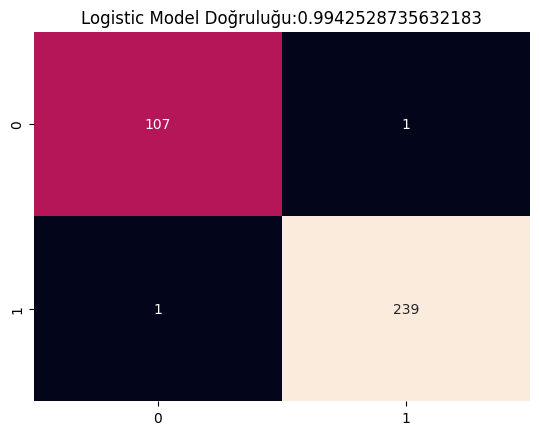

In [182]:
loj_model=yontemML.Logistic()


*****SVM Algoritmasi*****
SVM Model Dogrulugu: 0.7873563218390804
SVM Classification report
              precision    recall  f1-score   support

           0       0.31      1.00      0.48        34
           1       1.00      0.76      0.87       314

    accuracy                           0.79       348
   macro avg       0.66      0.88      0.67       348
weighted avg       0.93      0.79      0.83       348



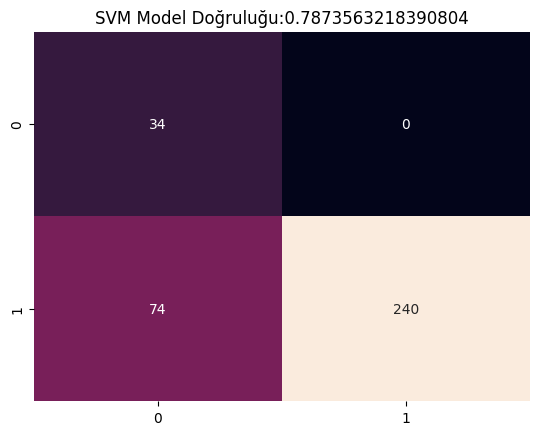

In [183]:
svm_model=yontemML.Svm()

*****KNN Algoritmasi*****
KNN Model Dogrulugu: 0.9367816091954023
KNN Classification report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       112
           1       0.95      0.96      0.95       236

    accuracy                           0.94       348
   macro avg       0.93      0.92      0.93       348
weighted avg       0.94      0.94      0.94       348



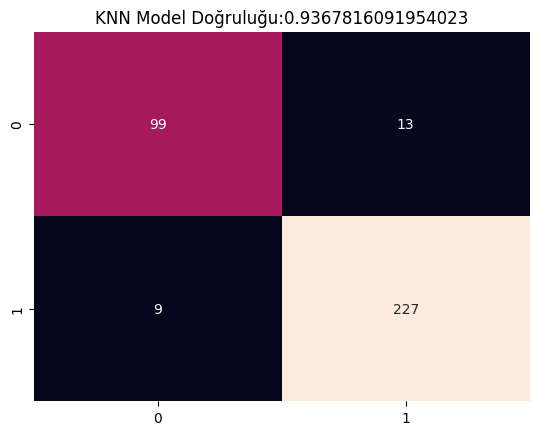

In [184]:
knn_model=yontemML.Knn()

*****Decision Tree Algoritmasi*****
Decision Tree Model Dogrulugu: 0.9080459770114943
Decision Tree Classification report
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       112
           1       0.93      0.94      0.93       236

    accuracy                           0.91       348
   macro avg       0.90      0.89      0.89       348
weighted avg       0.91      0.91      0.91       348



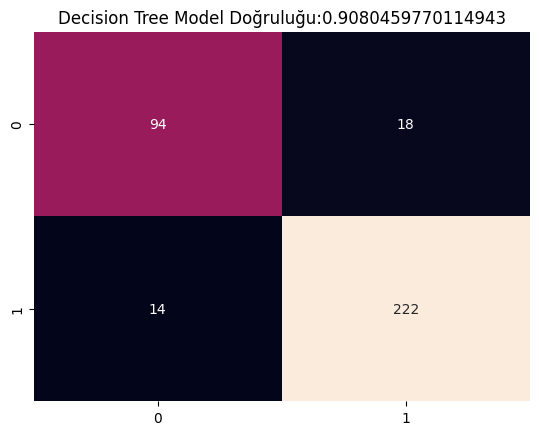

In [185]:
cart_model=yontemML.Decisiontree()

*****Random Forest Algoritmasi*****
Random Forest Model Dogrulugu: 0.9741379310344828
Random Forest Classification report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.99      0.98      0.98       243

    accuracy                           0.97       348
   macro avg       0.97      0.97      0.97       348
weighted avg       0.97      0.97      0.97       348



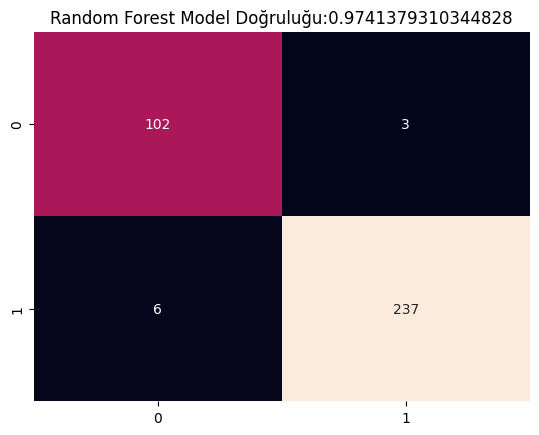

In [186]:
rf_model=yontemML.Randomforest()

*****GBM Algoritmasi*****
GBM Model Dogrulugu: 0.9885057471264368
GBM Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.99      0.99      0.99       240

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348



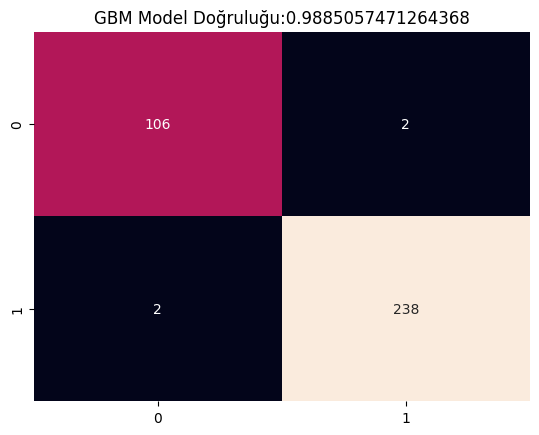

In [187]:
gbm_model=yontemML.Gbm()

*****Light GBM Algoritmasi*****
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 488, number of negative: 218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 706, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691218 -> initscore=0.805820
[LightGBM] [Info] Start training from score 0.805820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

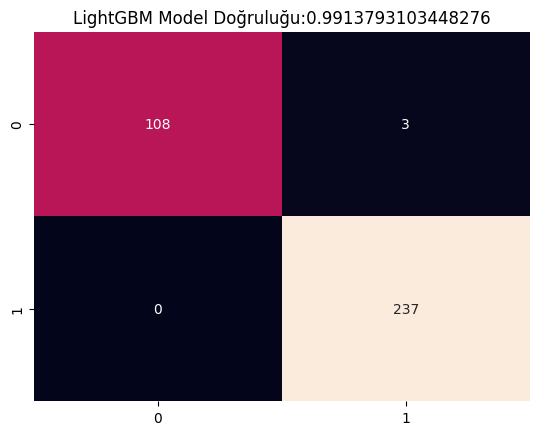

In [188]:
lgbm_model=yontemML.LightGBM()

*****XGBoost Algoritmasi*****
XGBOOST Model Dogrulugu: 0.9942528735632183
XGBOOST Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       1.00      1.00      1.00       240

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348



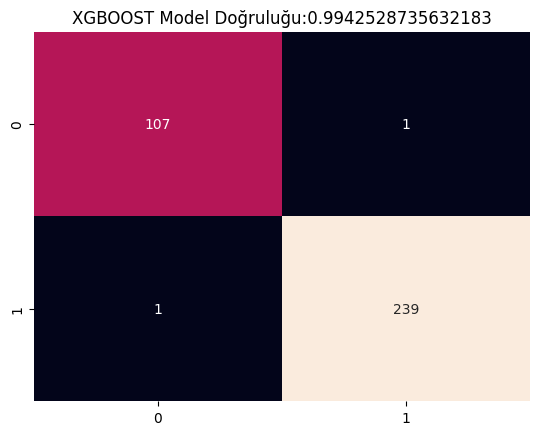

In [189]:
xgbm_model=yontemML.Xgboost()

*****MLPC Algoritmasi*****


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPC Model Dogrulugu: 0.985632183908046
MLPC Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       1.00      0.98      0.99       243

    accuracy                           0.99       348
   macro avg       0.98      0.99      0.98       348
weighted avg       0.99      0.99      0.99       348



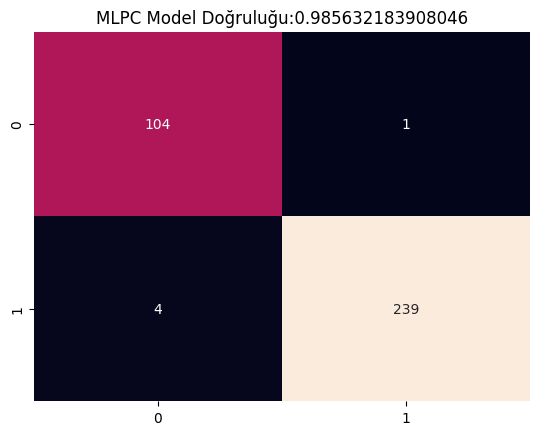

In [190]:
mlpc_model=yontemML.Mlpc()

In [195]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation="relu"))

model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
           tf.keras.metrics.Precision(name="prec"),
           tf.keras.metrics.Recall(name="recall")]

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=None
)
history = model.fit(X, y, batch_size=10, epochs=300, validation_split=0.2, callbacks=callback)

Epoch 1/300
85/85 [==============================] - 2s 9ms/step - loss: 0.5254 - acc: 1.0000 - auc: 0.8002 - prec: 0.7188 - recall: 0.9313 - val_loss: 0.4251 - val_acc: 1.0000 - val_auc: 0.9303 - val_prec: 0.7604 - val_recall: 1.0000
Epoch 2/300
85/85 [==============================] - 0s 4ms/step - loss: 0.3260 - acc: 1.0000 - auc: 0.9564 - prec: 0.8609 - recall: 0.9674 - val_loss: 0.3159 - val_acc: 1.0000 - val_auc: 0.9427 - val_prec: 0.8614 - val_recall: 0.9795
Epoch 3/300
85/85 [==============================] - 0s 4ms/step - loss: 0.2291 - acc: 1.0000 - auc: 0.9798 - prec: 0.9107 - recall: 0.9639 - val_loss: 0.2804 - val_acc: 1.0000 - val_auc: 0.9457 - val_prec: 0.8912 - val_recall: 0.8973
Epoch 4/300
85/85 [==============================] - 0s 4ms/step - loss: 0.1874 - acc: 1.0000 - auc: 0.9840 - prec: 0.9332 - recall: 0.9605 - val_loss: 0.2240 - val_acc: 1.0000 - val_auc: 0.9703 - val_prec: 0.8882 - val_recall: 0.9795
Epoch 5/300
85/85 [==============================] - 0s 4ms/